In [ ]:
# # Introduction
# In this workshop, we'll walk through the core data science process using Python.
# # Throughout this workshop, we will walk through the following subjects:
# # 
# # * Data Ingestion
# # * Data Preparation
# # * Analytical and Predictive Modeling
# 
# # By the end of this workshop, you should be comfortable using Python to perform basic data science tasks.  If you would like to expand your skills further, Cloudera provides a number of interesting projects, complete with code, at this location:
# # http://archive.ics.uci.edu/ml/datasets/Bank+Marketing
# 
# 
# # Agenda
# 
# Ingestion
# Exploration and Vizualization
# Feature Correlation
# Missing Values
# Dummy Coding
# Writing Files
# Model Training
# Model Evaluation
# 
#
# # Context
# 
# 
# age (numeric)
# job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
# marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
# education (categorical: basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
# default: has credit in default? (categorical: 'no','yes','unknown')
# housing_loan: has housing loan? (categorical: 'no','yes','unknown')
# personal_loan: has a personal loan? (categorical: 'no','yes','unknown')
# contact: contact communication type (categorical: 'cellular','telephone') 
# month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
# day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
# campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
# pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
# previous: number of contacts performed before this campaign and for this client (numeric)
# poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# emp.var.rate: employment variation rate - quarterly indicator (numeric)
# cons.price.idx: consumer price index - monthly indicator (numeric) 
# cons.conf.idx: consumer confidence index - monthly indicator (numeric) 
# euribor3m: euribor 3 month rate - daily indicator (numeric)
# nr.employed: number of employees - quarterly indicator (numeric)
# credit: (numeric) credit score
# auto_loan: will apply for housing loan? (categorical: 'no','yes')


In [ ]:
# Installing a library from the notebook if it is not previously installed
!pip3 install s3fs

### Data Ingestion

In [1]:
# Download a library
import pandas as pd

In [2]:
df = pd.read_csv('bank_marketing_data.csv', low_memory=False)

In [4]:
# Import data from S3

import s3fs
### df = pd.read_csv('s3://bucketname/bank_marketing_data.csv')

# Replace bucketname with the name of your S3 bucket and ensure it's public to be able to access the bucket.

In [6]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing_loan',
       'personal_loan', 'contact', 'month', 'day_of_week', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'credit', 'auto_loan'],
      dtype='object')

In [7]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing_loan       object
personal_loan      object
contact            object
month              object
day_of_week        object
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
credit              int64
auto_loan          object
dtype: object

### Single Variable Visualizations

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 20, 8; 

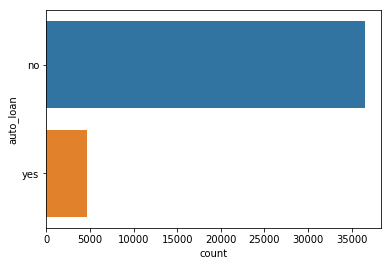

In [9]:
import seaborn as sns
sns.countplot(y='auto_loan', data=df)

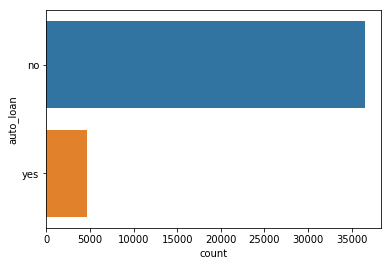

In [10]:
_ = sns.countplot(y='auto_loan', data=df)

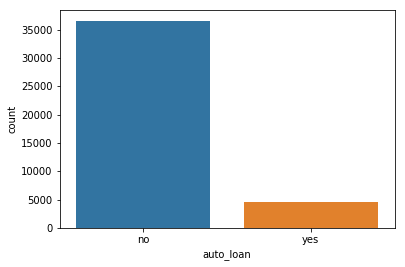

In [11]:
_ = sns.countplot(df.auto_loan)

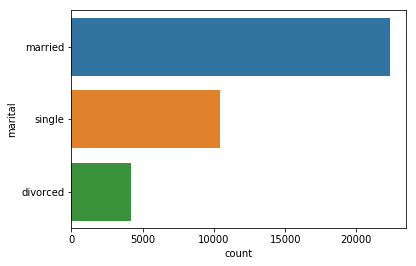

In [12]:
_ = sns.countplot(y='marital', data=df)

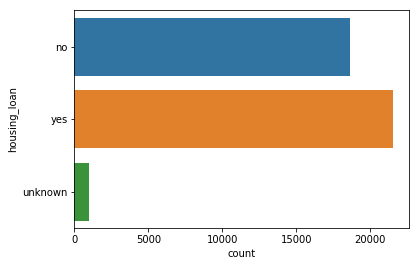

In [13]:
_ = sns.countplot(y='housing_loan', data=df)

In [14]:
df.age

0        56
1        57
2        37
3        40
4        56
5        45
6        59
7        41
8        24
9        25
10       41
11       25
12       29
13       57
14       35
15       54
16       35
17       46
18       50
19       39
20       30
21       55
22       55
23       41
24       37
25       35
26       59
27       39
28       54
29       55
         ..
41158    35
41159    35
41160    33
41161    33
41162    60
41163    35
41164    54
41165    38
41166    32
41167    32
41168    38
41169    62
41170    40
41171    33
41172    31
41173    62
41174    62
41175    34
41176    38
41177    57
41178    62
41179    64
41180    36
41181    37
41182    29
41183    73
41184    46
41185    56
41186    44
41187    74
Name: age, Length: 41188, dtype: int64

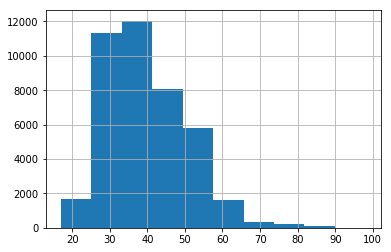

In [15]:
df.age.hist()

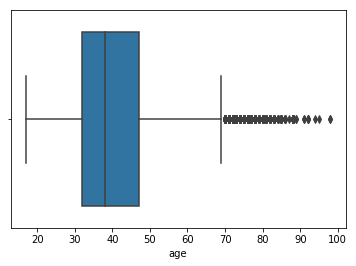

In [16]:
_ = sns.boxplot(x='age', data=df)

### Multi-Variable Visulations aka Feature Correlations

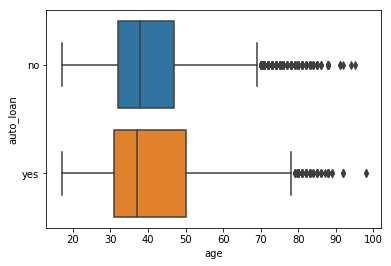

In [17]:
_ = sns.boxplot(x='age', y ='auto_loan', data=df)

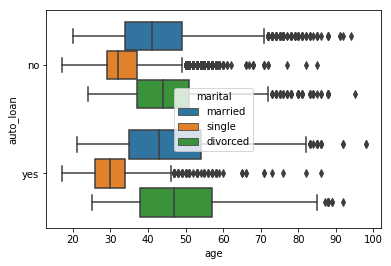

In [18]:
_ = sns.boxplot(x='age', y='auto_loan', hue='marital', data=df)

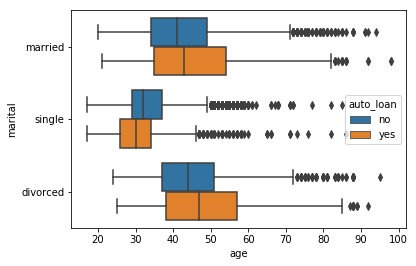

In [19]:
_ = sns.boxplot(x='age', y='marital', hue='auto_loan', data=df)

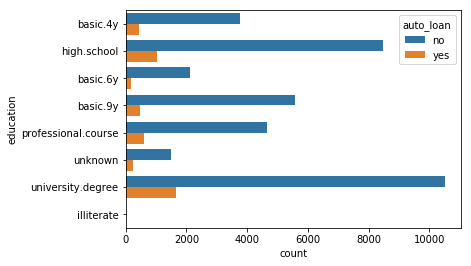

In [20]:
_ = sns.countplot(y='education', hue='auto_loan', data=df)

In [21]:
df.education.value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

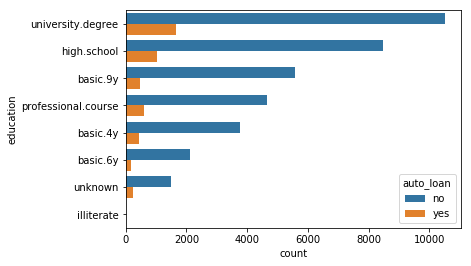

In [22]:
_ = sns.countplot(y='education', hue='auto_loan', data=df, order=df.education.value_counts().index)

In [23]:
df.corr()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,credit
age,1.000000,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725,0.002269
campaign,0.004594,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095,-0.022486
pdays,-0.034369,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605,-0.105187
previous,0.024365,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333,0.070793
emp.var.rate,-0.000371,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970,-0.095246
cons.price.idx,0.000857,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034,-0.039517
cons.conf.idx,0.129372,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513,0.014521
euribor3m,0.010767,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154,-0.098618
nr.employed,-0.017725,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000,-0.115507
credit,0.002269,-0.022486,-0.105187,0.070793,-0.095246,-0.039517,0.014521,-0.098618,-0.115507,1.000000


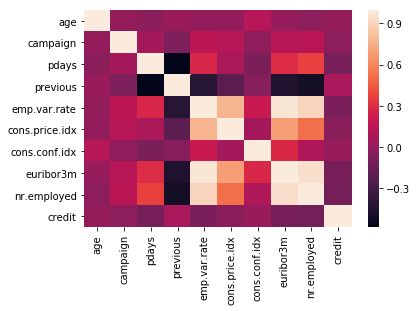

In [24]:
_ = sns.heatmap(df.corr())

### Handling Missing Values

In [25]:
df.isnull()

,age,job,marital,education,default,housing_loan,personal_loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,credit,auto_loan
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [26]:
df.isnull().head(2)

,age,job,marital,education,default,housing_loan,personal_loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,credit,auto_loan
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [27]:
df.isnull().sum()

age                  0
job                  0
marital           4195
education            0
default              0
housing_loan         0
personal_loan        0
contact              0
month                0
day_of_week          0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
credit               0
auto_loan            0
dtype: int64

In [28]:
df.marital.value_counts()

married     22382
single      10433
divorced     4178
Name: marital, dtype: int64

In [29]:
df.marital.fillna(value='unknown')

0         married
1         married
2         married
3         married
4         married
5         married
6         married
7         married
8          single
9          single
10        unknown
11         single
12         single
13       divorced
14        married
15        married
16        married
17        married
18        married
19         single
20        married
21        married
22         single
23         single
24        married
25        married
26        married
27        married
28         single
29        married
           ...   
41158    divorced
41159    divorced
41160     married
41161     married
41162     married
41163    divorced
41164     married
41165    divorced
41166     married
41167     married
41168     married
41169     married
41170    divorced
41171     married
41172      single
41173     married
41174     married
41175      single
41176    divorced
41177     married
41178     married
41179    divorced
41180     married
41181     married
41182     

In [30]:
df.marital.mode()

0    married
dtype: object

In [31]:
df.marital.mode()[0]

'married'

In [32]:
df.marital.fillna(value=df.marital.mode()[0])

0         married
1         married
2         married
3         married
4         married
5         married
6         married
7         married
8          single
9          single
10        married
11         single
12         single
13       divorced
14        married
15        married
16        married
17        married
18        married
19         single
20        married
21        married
22         single
23         single
24        married
25        married
26        married
27        married
28         single
29        married
           ...   
41158    divorced
41159    divorced
41160     married
41161     married
41162     married
41163    divorced
41164     married
41165    divorced
41166     married
41167     married
41168     married
41169     married
41170    divorced
41171     married
41172      single
41173     married
41174     married
41175      single
41176    divorced
41177     married
41178     married
41179    divorced
41180     married
41181     married
41182     

In [33]:
df.marital.fillna(value='unknown', inplace=True)

In [34]:
df.marital.value_counts()

married     22382
single      10433
unknown      4195
divorced     4178
Name: marital, dtype: int64

In [35]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing_loan      0
personal_loan     0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
credit            0
auto_loan         0
dtype: int64

### Dummy Coding

In [36]:
df.job.value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [37]:
pd.get_dummies(df.job).head()

,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0


In [38]:
job_dummy = pd.get_dummies(df.job)
job_dummy.columns

Index(['admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management',
       'retired', 'self-employed', 'services', 'student', 'technician',
       'unemployed', 'unknown'],
      dtype='object')

In [39]:
['job_' + col for col in job_dummy.columns]

['job_admin.',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_unknown']

In [40]:
job_dummy.head()

,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0


In [41]:
job_dummy.columns = ['job_' + col for col in job_dummy.columns]

In [42]:
job_dummy.columns.str.replace(pat='-', repl='_')

Index(['job_admin.', 'job_blue_collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self_employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown'],
      dtype='object')

In [43]:
job_dummy.columns = job_dummy.columns.str.replace(pat='-', repl='_')
job_dummy.columns = job_dummy.columns.str.replace(pat='.', repl='_')

In [44]:
marital_dummy = pd.get_dummies(df.marital)
marital_dummy.columns = ['marital_' + col for col in marital_dummy.columns]
education_dummy = pd.get_dummies(df.education)
education_dummy.columns = ['education_' + col for col in education_dummy.columns]
education_dummy.columns = education_dummy.columns.str.replace(pat='.', repl='_')
default_dummy = pd.get_dummies(df.default)
default_dummy.columns = ['default_' + col for col in default_dummy.columns]
housing_loan_dummy = pd.get_dummies(df.housing_loan)
housing_loan_dummy.columns = ['housing_loan_' + col for col in housing_loan_dummy.columns]
personal_loan_dummy = pd.get_dummies(df.personal_loan)
personal_loan_dummy.columns = ['personal_loan_' + col for col in personal_loan_dummy.columns]
contact_dummy = pd.get_dummies(df.contact)
contact_dummy.columns = ['contact_' + col for col in contact_dummy.columns]
month_dummy = pd.get_dummies(df.month)
month_dummy.columns = ['month_' + col for col in month_dummy.columns]
weekday_dummy = pd.get_dummies(df.day_of_week)
weekday_dummy.columns = ['weekday_' + col for col in weekday_dummy.columns]
poutcome_dummy = pd.get_dummies(df.poutcome)
poutcome_dummy.columns = ['poutcome_' + col for col in poutcome_dummy.columns]

In [45]:
pd.get_dummies(df.auto_loan).columns

Index(['no', 'yes'], dtype='object')

In [46]:
pd.get_dummies(df.auto_loan).yes

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       0
27       0
28       0
29       0
        ..
41158    1
41159    1
41160    1
41161    0
41162    0
41163    1
41164    1
41165    1
41166    1
41167    0
41168    0
41169    0
41170    0
41171    1
41172    1
41173    1
41174    1
41175    0
41176    0
41177    0
41178    1
41179    0
41180    0
41181    1
41182    0
41183    1
41184    0
41185    0
41186    1
41187    0
Name: yes, Length: 41188, dtype: uint8

In [47]:
auto_loan_dummy = pd.get_dummies(df.auto_loan)
auto_loan_dummy.columns

Index(['no', 'yes'], dtype='object')

In [48]:
auto_loan_dummy.drop(['no'], axis=1, inplace=True)
auto_loan_dummy.columns

Index(['yes'], dtype='object')

In [49]:
auto_loan_dummy.columns = ['auto_loan_yes']
auto_loan_dummy.columns

Index(['auto_loan_yes'], dtype='object')

In [50]:
pd.concat([default_dummy, housing_loan_dummy], axis=1)

,default_no,default_unknown,default_yes,housing_loan_no,housing_loan_unknown,housing_loan_yes
0,1,0,0,1,0,0
1,0,1,0,1,0,0
2,1,0,0,0,0,1
3,1,0,0,1,0,0
4,1,0,0,1,0,0
5,0,1,0,1,0,0
6,1,0,0,1,0,0
7,0,1,0,1,0,0
8,1,0,0,0,0,1
9,1,0,0,0,0,1


In [51]:
df_dummy = pd.concat([df, job_dummy, marital_dummy, education_dummy, default_dummy, housing_loan_dummy, personal_loan_dummy,
                      contact_dummy, month_dummy, weekday_dummy, poutcome_dummy, auto_loan_dummy], axis=1)

In [52]:
df_dummy.drop(['job', 'marital', 'education', 'default', 'housing_loan', 'personal_loan', 'contact', \
               'month', 'day_of_week', 'poutcome', 'auto_loan'], axis=1, inplace=True)
df_dummy.columns

Index(['age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'credit',
       'job_admin_', 'job_blue_collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self_employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic_4y', 'education_basic_6y',
       'education_basic_9y', 'education_high_school', 'education_illiterate',
       'education_professional_course', 'education_university_degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_loan_no', 'housing_loan_unknown', 'housing_loan_yes',
       'personal_loan_no', 'personal_loan_unknown', 'personal_loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_m

In [53]:
df_dummy.head()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,credit,...,month_sep,weekday_fri,weekday_mon,weekday_thu,weekday_tue,weekday_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,auto_loan_yes
0,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,474,...,0,0,1,0,0,0,0,1,0,0
1,57,1,999,0,1.1,93.994,-36.4,4.857,5191.0,480,...,0,0,1,0,0,0,0,1,0,0
2,37,1,999,0,1.1,93.994,-36.4,4.857,5191.0,523,...,0,0,1,0,0,0,0,1,0,0
3,40,1,999,0,1.1,93.994,-36.4,4.857,5191.0,649,...,0,0,1,0,0,0,0,1,0,0
4,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,535,...,0,0,1,0,0,0,0,1,0,0


In [54]:
# Write the finalized file back to storage
df_dummy.to_csv('encoded_bank_marketing_dummy.csv')

df_dummy.to_csv('encoded_bank_marketing_dummy.tsv', sep='\t')

### Predictive Model Training

In [55]:
X = df_dummy.drop('auto_loan_yes', axis=1)
X.shape

(41188, 63)

In [56]:
y = df_dummy.auto_loan_yes
y.shape

(41188,)

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)

X_train.shape
X_test.shape
y_train.shape
y_test.shape

(12357,)

In [58]:
from sklearn import tree
dtree_clf = tree.DecisionTreeClassifier() #(max_leaf_nodes=3)

In [59]:
_ = dtree_clf.fit(X_train, y_train)

In [60]:
dtree_clf.predict(X_test)

array([1, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [61]:
dtree_pred = dtree_clf.predict(X_test)

In [62]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, dtree_pred)

0.8875940762320952

In [63]:
dtree_acc = accuracy_score(y_test, dtree_pred)

In [64]:
# Misclassification
1 - accuracy_score(y_test, dtree_pred)

0.11240592376790481

In [65]:
from sklearn import ensemble
rf_clf = ensemble.RandomForestClassifier()
_ = rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
rf_acc = accuracy_score(y_test, rf_pred)

rf_acc

0.9277332685927004

In [66]:
gb_clf = ensemble.GradientBoostingClassifier()
_ = gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)
gb_acc = accuracy_score(y_test, gb_pred)

gb_acc

0.9312940033988832

Precision talks about how precise/accurate your model is out of those predicted positive, how many of them are actual positive. Precision is a good measure to determine, when the costs of False Positive is high. 

Recall calculates how many of the Actual Positives our model capture through labeling it as Positive (True Positive). Recall will be the model metric to use when there is a high cost associated with False Negative.


F1 Score might be a better measure to use if we need to seek a balance between Precision and Recall AND there is an uneven class distribution (large number of Actual Negatives)

In [67]:
# Other Evaluation Metrics
from sklearn.metrics import classification_report
print('.....Decision Tree Classification Report......')
print(classification_report(y_test, dtree_pred))
print('.....Random Forest Classification Report......')
print(classification_report(y_test, rf_pred))
print('.....Gradient Boosting Classification Report......')
print(classification_report(y_test, gb_pred))

.....Decision Tree Classification Report......
             precision    recall  f1-score   support

          0       0.94      0.93      0.94     10955
          1       0.50      0.54      0.52      1402

avg / total       0.89      0.89      0.89     12357

.....Random Forest Classification Report......
             precision    recall  f1-score   support

          0       0.94      0.99      0.96     10955
          1       0.81      0.47      0.60      1402

avg / total       0.92      0.93      0.92     12357

.....Gradient Boosting Classification Report......
             precision    recall  f1-score   support

          0       0.94      0.99      0.96     10955
          1       0.85      0.48      0.61      1402

avg / total       0.93      0.93      0.92     12357

